In [1]:
%matplotlib inline

In [65]:
# Write your imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. The data mining process

In this lab, you'll get acquainted with the most streamed songs on Spotify in 2024. The dataset and its associated metadata can be found [here](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024). The version you'll need is provided in the `data/` folder.

You know the drill. Do what you can / want / need to answer the questions to the best of your ability. Answers do not need to be trivial, or even the same among different people.

In [17]:
def to_snake_case(input: str, separator = ' '):
  if(type(input) != str):
    return input
  stripped_input = input.strip()
  split_values = [ val.strip().lower() for val in stripped_input.split(separator) if len(val.strip()) > 0]
  if (len(split_values) == 1):
    return split_values[0]
  return '_'.join(split_values)

### Problem 1. Read the dataset (1 point)
Read the file without unzipping it first. You can try a different character encoding, like `unicode_escape`. Don't worry too much about weird characters.

In [11]:
input_zip_file_path = 'data/spotify_most_streamed_2024.zip'
csv_file = 'Most Streamed Spotify Songs 2024.csv'

with zipfile.ZipFile(input_zip_file_path, "r") as z:
    with z.open(csv_file) as file:
        spotify_original = pd.read_csv(file, encoding = "ISO-8859-1")

spotify_original.to_csv('data/' + csv_file, index = False) 

In [12]:
spotify_original.shape

(4600, 29)

In [13]:
spotify_original.head

<bound method NDFrame.head of                                 Track                        Album Name  \
0                 MILLION DOLLAR BABY      Million Dollar Baby - Single   
1                         Not Like Us                       Not Like Us   
2          i like the way you kiss me        I like the way you kiss me   
3                             Flowers                  Flowers - Single   
4                             Houdini                           Houdini   
...                               ...                               ...   
4595                For the Last Time                 For the Last Time   
4596                 Dil Meri Na Sune  Dil Meri Na Sune (From "Genius")   
4597            Grace (feat. 42 Dugg)                           My Turn   
4598              Nashe Si Chadh Gayi             November Top 10 Songs   
4599  Me Acostumbre (feat. Bad Bunny)   Me Acostumbre (feat. Bad Bunny)   

              Artist Release Date          ISRC All Time Rank  Track 

### Problem 2. Perform some cleaning (1 point)
Ensure all data has been read correctly; check the data types. Give the columns better names (e.g. `all_time_rank`, `track_score`, etc.). To do so, try to use `apply()` instead of a manual mapping between old and new name. Get rid of any unnecessary ones.

In [14]:
spotify_original.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

In [16]:
spotify_original.dtypes

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud Streams             object
Shazam Count

In [18]:
spotify_original.columns = spotify_original.columns.to_series().apply(to_snake_case)
spotify_original.columns

Index(['track', 'album_name', 'artist', 'release_date', 'isrc',
       'all_time_rank', 'track_score', 'spotify_streams',
       'spotify_playlist_count', 'spotify_playlist_reach',
       'spotify_popularity', 'youtube_views', 'youtube_likes', 'tiktok_posts',
       'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach',
       'apple_music_playlist_count', 'airplay_spins', 'siriusxm_spins',
       'deezer_playlist_count', 'deezer_playlist_reach',
       'amazon_playlist_count', 'pandora_streams', 'pandora_track_stations',
       'soundcloud_streams', 'shazam_counts', 'tidal_popularity',
       'explicit_track'],
      dtype='object')

In [19]:
spotify_original.isna().sum()

track                            0
album_name                       0
artist                           5
release_date                     0
isrc                             0
all_time_rank                    0
track_score                      0
spotify_streams                113
spotify_playlist_count          70
spotify_playlist_reach          72
spotify_popularity             804
youtube_views                  308
youtube_likes                  315
tiktok_posts                  1173
tiktok_likes                   980
tiktok_views                   981
youtube_playlist_reach        1009
apple_music_playlist_count     561
airplay_spins                  498
siriusxm_spins                2123
deezer_playlist_count          921
deezer_playlist_reach          928
amazon_playlist_count         1055
pandora_streams               1106
pandora_track_stations        1268
soundcloud_streams            3333
shazam_counts                  577
tidal_popularity              4600
explicit_track      

`tidal_popularity` has no data, So we do not need it.

In [66]:
spotify_wip = spotify_original.drop('tidal_popularity', axis='columns')




We will try to analyze all other columnst using a common fucntion

In [75]:


def get_colunm_float_probability(col: pd.Series) -> (float, str):
  if (col.dtype == float or col.dtype == pd.Float64Dtype):
    (1.0, 'Already a float')
  
  na_count = 0
  float_count = 0
  can_be_converted_to_float_count = 0
  has_to_remove_commas_count = 0
  not_a_float_count = 0

  not_in_use_count = 0


  for index, value in col.items():
    try:
      if np.isnan(value):
        na_count += 1
        continue
    except TypeError:
      not_in_use_count+=1

    if (type(value) == float):
      float_count += 1
      continue
    try:
      float(value)
      can_be_converted_to_float_count += 1
      continue
    except ValueError:
      not_in_use_count+=1
    
    if type(value) == str:
      # lets try
      try:
        float(value.replace(',','').replace(' ', ''))
        has_to_remove_commas_count += 1
        continue
      except ValueError:
        not_in_use_count+=1
    not_a_float_count += 1    
    
  probabel_float_count = float_count + can_be_converted_to_float_count + has_to_remove_commas_count

  details = {
    'na_count': na_count,
    'float_count': float_count,
    'can_be_converted_to_float_count': can_be_converted_to_float_count,
    'has_to_remove_commas_count': has_to_remove_commas_count,
    'not_a_float_count': not_a_float_count
  }
  if (probabel_float_count > not_a_float_count):
    return (probabel_float_count/ probabel_float_count + not_a_float_count, details)
  return (0, details)


def get_possible_float_columns(df: pd.DataFrame) -> list[(str, float, str)]:
  return [
    (column_name, score, msg) for (column_name, (score, msg)) in
    [(column_name, get_colunm_float_probability(df[column_name])) for column_name in list(df.columns)]]

possible_float_columns = get_possible_float_columns(spotify_wip.select_dtypes(include='object'))

list_of_dict = [ { 'column_name': column_name,
                  'score': score, 
                  'na_count': details['na_count'],
                  'float_count': details['float_count'],
                  'can_be_converted_to_float_count': details['can_be_converted_to_float_count'],
                  'has_to_remove_commas_count': details['has_to_remove_commas_count'],
                  'not_a_float_count': details['not_a_float_count']   }
                for column_name, score, details in possible_float_columns ]

possible_float_df = pd.DataFrame.from_records(list_of_dict)

float_df = possible_float_df[possible_float_df['score'] > 0.5]
float_df = float_df.reset_index()
float_df

,index,column_name,score,na_count,float_count,can_be_converted_to_float_count,has_to_remove_commas_count,not_a_float_count
0,5,all_time_rank,1.0,0,0,1004,3596,0
1,6,spotify_streams,1.0,113,0,0,4487,0
2,7,spotify_playlist_count,1.0,70,0,520,4010,0
3,8,spotify_playlist_reach,1.0,72,0,154,4374,0
4,9,youtube_views,1.0,308,0,1,4291,0
5,10,youtube_likes,1.0,315,0,17,4268,0
6,11,tiktok_posts,1.0,1173,0,170,3257,0
7,12,tiktok_likes,1.0,980,0,40,3580,0
8,13,tiktok_views,1.0,981,0,13,3606,0
9,14,youtube_playlist_reach,1.0,1009,0,41,3550,0


We identify 16 columns which were identified as object, but can be converted to float. But we have to dremove the thousands spearator: `,`.
We will apply those rules to those columns and we will force pandas to cast them as floats

In [81]:
float_columns_to_manipulate = [ value for _, value in float_df['column_name'].items()]
print(float_columns_to_manipulate)

for column_name in float_columns_to_manipulate:
  spotify_wip[column_name] = spotify_wip[column_name].apply(lambda x: x.replace(",", "") if isinstance(x, str) else x)

spotify_wip[float_columns_to_manipulate] = spotify_wip[float_columns_to_manipulate].astype(float)

spotify_wip.dtypes

['all_time_rank', 'spotify_streams', 'spotify_playlist_count', 'spotify_playlist_reach', 'youtube_views', 'youtube_likes', 'tiktok_posts', 'tiktok_likes', 'tiktok_views', 'youtube_playlist_reach', 'airplay_spins', 'siriusxm_spins', 'deezer_playlist_reach', 'pandora_streams', 'pandora_track_stations', 'soundcloud_streams', 'shazam_counts']


track                          object
album_name                     object
artist                         object
release_date                   object
isrc                           object
all_time_rank                 float64
track_score                   float64
spotify_streams               float64
spotify_playlist_count        float64
spotify_playlist_reach        float64
spotify_popularity            float64
youtube_views                 float64
youtube_likes                 float64
tiktok_posts                  float64
tiktok_likes                  float64
tiktok_views                  float64
youtube_playlist_reach        float64
apple_music_playlist_count    float64
airplay_spins                 float64
siriusxm_spins                float64
deezer_playlist_count         float64
deezer_playlist_reach         float64
amazon_playlist_count         float64
pandora_streams               float64
pandora_track_stations        float64
soundcloud_streams            float64
shazam_count

### Problem 3. Most productive artists (1 point)
Who are the five artists with the most songs in the dataset?

Who are the five "clean-mouthed" artists (i.e., with no explicit songs)? **Note:** We're not going into details but we can start a discussion about whether a song needs swearing to be popular.

In [85]:
spotify_wip.groupby('artist').size().sort_values(ascending = False)[0:5]

artist
Drake           63
Taylor Swift    63
Bad Bunny       60
KAROL G         32
The Weeknd      31
dtype: int64

In [92]:
spotify_wip.groupby('artist').filter(lambda x: all(x['explicit_track'] == 0))['artist'].value_counts()[0:5]

artist
Imagine Dragons    16
BTS                14
Luke Combs         13
Linkin Park        13
Bruno Mars         12
Name: count, dtype: int64

### Problem 4. Most streamed artists (1 point)
And who are the top five most streamed (as measured by Spotify streams) artists?

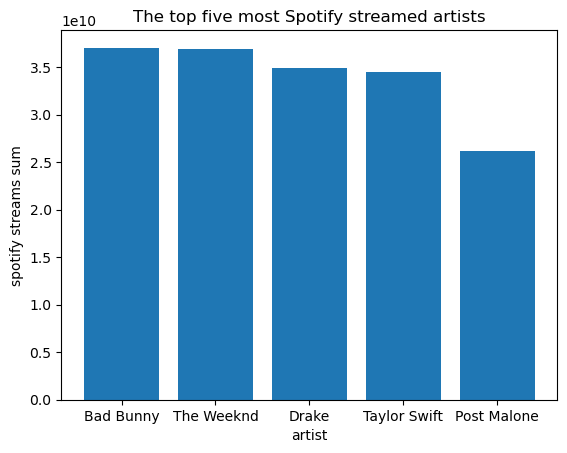

In [100]:
top_streamed_artists = spotify_wip.groupby('artist')['spotify_streams'].sum().sort_values(ascending=False)[0:5]

plt.bar(top_streamed_artists.index, top_streamed_artists)
plt.ylabel('spotify streams sum')
plt.xlabel('artist')
plt.title('The top five most Spotify streamed artists')
plt.show()

### Problem 5. Songs by year and month (1 point)
How many songs have been released each year? Present an appropriate plot. Can you explain the behavior of the plot for 2024?

How about months? Is / Are there (a) popular month(s) to release music?

### Problem 6. Playlists (2 points)
Is there any connection (correlation) between users adding a song to playlists in one service, or another? Only Spotify, Apple, Deezer, and Amazon offer the ability to add a song to a playlist. Find a way to plot all these relationships at the same time, and analyze them. Experiment with different types of correlations.

### Problem 7. YouTube views and likes (1 point)
What is the relationship between YouTube views and likes? Present an appropriate plot. 

What is the mean YouTube views-to-likes ratio? What is its distribution? Find a way to plot it and describe it.

### Problem 8. TikTok stuff (2 points)
The most popular songs on TikTok released every year show... interesting behavior. Which years peaked the most TikTok views? Show an appropriate chart. Can you explain this behavior? For a bit of context, TikTok was created in 2016.

Now, how much popular is the most popular song for each release year, than the mean popularity? Analyze the results.

In both parts, it would be helpful to see the actual songs.

### * Problem 9. Explore (and clean) at will
There is a lot to look for here. For example, you can easily link a song to its genres, and lyrics. You may also try to link artists and albums to more info about them. Or you can compare and contrast a song's performance across different platforms, in a similar manner to what you already did above; maybe even assign a better song ranking system (across platforms with different popularity metrics, and different requirements) than the one provided in the dataset.